In [195]:
import sys
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [196]:
size = 100
alpha = 0.95
n_test = 1000

In [197]:
def draw_interval(down, up, start, height):
    grid = np.linspace(1, size, size)
    plt.figure(figsize=(18, 5))
    plt.axis([0, 100, start, start + height])
    plt.fill_between(grid, down, up, color = 'orange')
    plt.show()
    
def get_interval_quality(distibution, down, up, theta):
    for N in [10, 100]:
        d = 0
        for i in range(n_test):
            if theta >= down(distibution(N), N) and theta <= up(distibution(N), N):
                d += 1
        print("when size of sample = " + str(N) + " quality = " \
              + str(d * 1. / n_test))

Рассмотрим равномерное распределене с параметрами $(0, 1)$
Доверительный интервал уровня $\alpha$ вычисляется по формуле:
$$(\frac{2 \overline X}{1 + \left(\sqrt{3n(1-\alpha)}\right)^{-1}}, \frac{2 \overline X}{1 - \left(\sqrt{3n(1-\alpha)}\right)^{-1}})$$

In [198]:
get_interval_quality(
    lambda n: sps.uniform.rvs(loc=0, scale=1, size=n),
    lambda sample, n: 
        2 * np.mean(sample[0:n]) / (1 + ((3 * n * (1 - alpha)) ** -0.5)),
    lambda sample, n: 
        2 * np.mean(sample[0:n]) / (1 - ((3 * n * (1 - alpha)) ** -0.5)),
    1
)

when size of sample = 10 quality = 1.0
when size of sample = 100 quality = 1.0


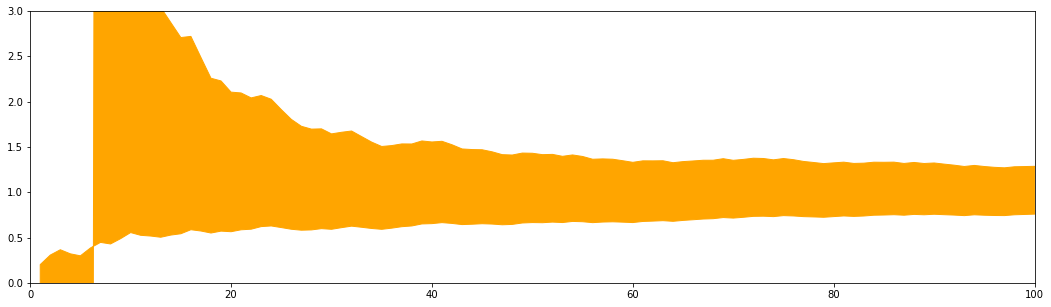

In [199]:
sample = sps.uniform.rvs(loc=0, scale=1, size=size)
up = []
down = []
for i in range(1, len(sample) + 1):
    x = (3 * i * (1 - alpha)) ** -0.5
    mean = 2 * np.mean(sample[0:i])
    down.append(mean / (1 + x))
    up.append(mean / (1 - x))
draw_interval(down, up, 0, 3)

Так же уже точный интервал уровня $\alpha$ можно посчитать по формуле:
$$(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$$

In [200]:
get_interval_quality(
    lambda n: sps.uniform.rvs(loc=0, scale=1, size=n),
    lambda sample, n: np.max(sample[0:n]),
    lambda sample, n: np.max(sample[0:n]) / ((1 - alpha) ** (1. / n)), 
    1
)

when size of sample = 10 quality = 0.952
when size of sample = 100 quality = 0.939


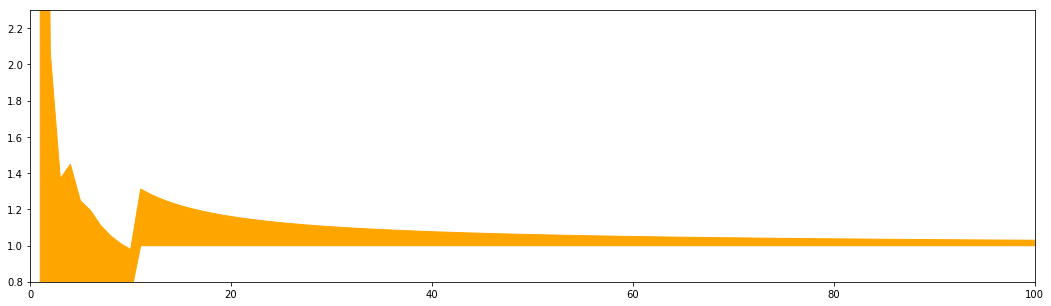

In [201]:
sample = sps.uniform.rvs(loc=0, scale=1, size=size)
up = []
down = []
for i in range(1, len(sample) + 1):
    x = (1 - alpha) ** (1. / i)
    down.append(np.max(sample[0:i]))
    up.append(np.max(sample[0:i]) / x)
draw_interval(down, up, 0.8, 1.5)

И по формуле:
$$(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$$

In [202]:
get_interval_quality(
    lambda n: sps.uniform.rvs(loc=0, scale=1, size=n),
    lambda sample, n: np.min(sample[0:n]),
    lambda sample, n: np.min(sample[0:n]) / (1 - alpha ** (1. / n)),
    1
)

when size of sample = 10 quality = 0.948
when size of sample = 100 quality = 0.945


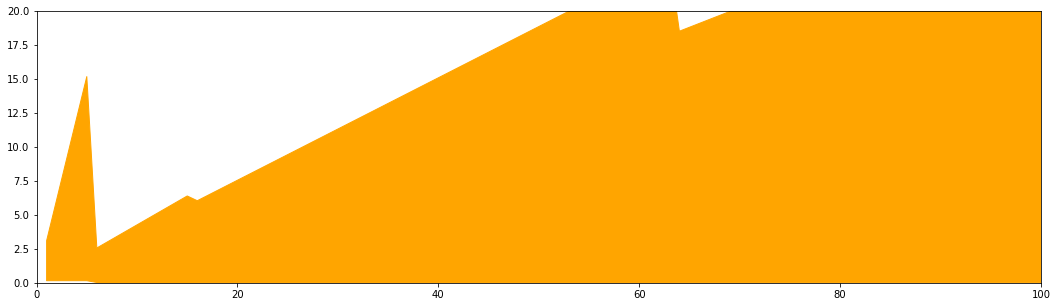

In [203]:
sample = sps.uniform.rvs(loc=0, scale=1, size=size)
up = []
down = []
for i in range(1, len(sample) + 1):
    x = 1 - alpha ** (1. / i)
    down.append(np.min(sample[0:i]))
    up.append(np.min(sample[0:i])* 1. / x)
draw_interval(down, up, 0, 20) 

Как мы видим, для точных доверительных интервалов их качество соответствует $\alpha$, в то время, как при неточных интервалов качество выше (в нашем случае, так и вообще, абсолютное)

Асимптотический доверительный интервал уровня $\alpha$ для $Cauchy(\theta, 1)$ вычисляется по формуле $$(median(X) - \frac{\pi z} {2 \sqrt{n}}, median(X) + \frac{\pi z} {2 \sqrt{n}})$$ $z$ - квантиль для нормального распределение для уровня $\frac{\alpha + 1}{2}$ 

In [204]:
z = sps.norm.ppf((1 + alpha) / 2)
get_interval_quality((lambda n: sps.cauchy.rvs(loc=0, scale=1, size=n) + 1), 
              (lambda x, n: np.median(x) - np.pi * z / (2 * (n ** 0.5))), 
              (lambda x, n: np.median(x) + np.pi * z / (2 * (n ** 0.5))),
              1)

when size of sample = 10 quality = 0.92
when size of sample = 100 quality = 0.945


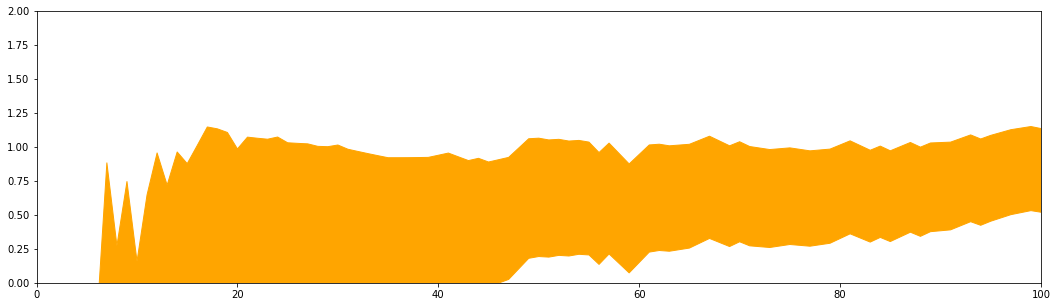

In [205]:
sample = sps.cauchy.rvs(loc=0, scale=1, size=size) + 1
up = []
down = []
for i in range(1, len(sample) + 1):
    down.append(np.median(sample[0:i]) - np.pi * z / (2 * (i ** 0.5)))
    up.append(np.median(sample[0:i]) + np.pi * z / (2 * (i ** 0.5)))
draw_interval(down, up, 0, 2) 

Асимптотический доверительный интервал для $Pois(\theta)$ уровня $\alpha$ вычисляется по формуле: $$(\overline X - z \frac{\overline X}{\sqrt{n}}, \overline X + z \frac{\overline X}{\sqrt{n}})$$ $z$ - квантиль для нормального распределения для уровня $\frac{\alpha + 1}{2}$ 

In [206]:
get_interval_quality((lambda n: sps.poisson.rvs(1, size=n)), 
              (lambda x, n: np.mean(x) - np.mean(x) * z / (n ** 0.5)), 
              (lambda x, n: np.mean(x) + np.mean(x) * z / (n ** 0.5)),
              1)

when size of sample = 10 quality = 0.863
when size of sample = 100 quality = 0.954


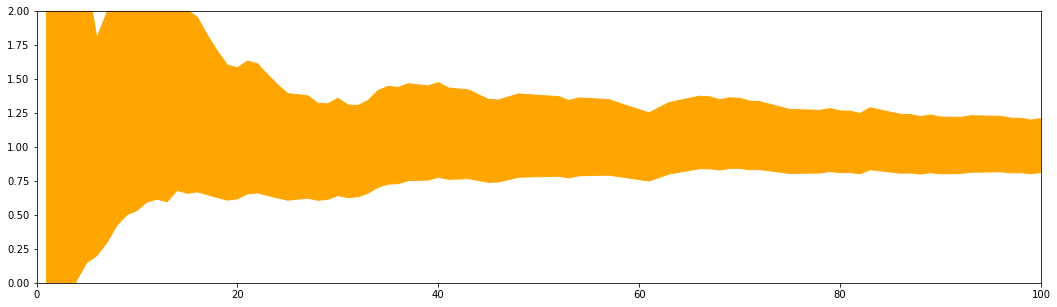

In [207]:
sample = sps.poisson.rvs(1, size=size)
up = []
down = []
for i in range(1, len(sample) + 1):
    down.append(np.mean(sample[0:i]) - np.mean(sample[0:i]) * z / (i ** 0.5))
    up.append(np.mean(sample[0:i]) + np.mean(sample[0:i]) * z / (i ** 0.5))
draw_interval(down, up, 0, 2) 

Асимптотический доверительный интервал для $Г(\theta, \lambda)$ уровня $\alpha$ вычисляется по формуле: $$(\frac{\lambda - z \sqrt{\frac{\lambda}{n}}}{\overline X}, \frac{\lambda + z \sqrt{\frac{\lambda}{n}}}{\overline X})$$ $z$ - квантиль для нормального распределения для уровня $\frac{\alpha + 1}{2}$ 

In [208]:
get_interval_quality((lambda n: sps.gamma.rvs(1, size=n)), 
              (lambda x, n: (1 - z * ((1. / n) ** 0.5)) / (np.mean(x))), 
              (lambda x, n: (1 + z * ((1. / n) ** 0.5)) / (np.mean(x))),
              1)

when size of sample = 10 quality = 0.943
when size of sample = 100 quality = 0.956


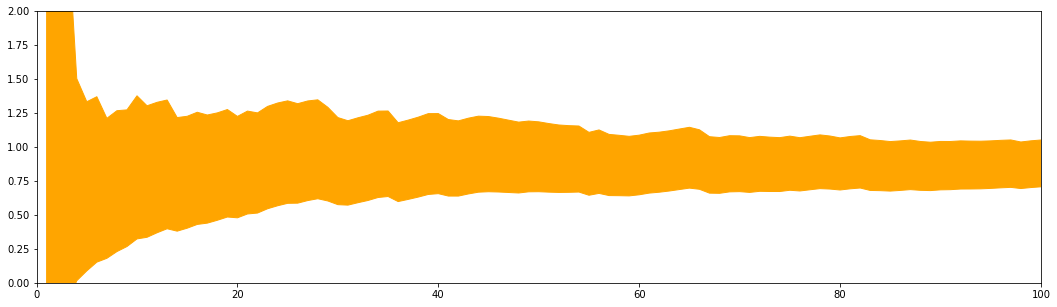

In [209]:
sample = sps.gamma.rvs(1, size=size)
up = []
down = []
for i in range(1, len(sample) + 1):
    down.append((1 - z * ((1. / i) ** 0.5)) / (np.mean(sample[0:i])))
    up.append((1 + z * ((1. / i) ** 0.5)) / (np.mean(sample[0:i])))
draw_interval(down, up, 0, 2) 